In [90]:
#immporto librerie
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
import cv2
import os
import re
import random

In [93]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [94]:
#Unione delle cartelle immagini e caricamento dataset

os.chdir("/content/drive/My Drive/Progetto DL")

folder =  "./dati_genetici.zip"
images = []
labels = [] #etichette 0,1. 0:neutral, 1:selection

#target_size = (48,1000) #Dimensione delle immagini

def load_images_from_folder_recursive(folder):
    """
    Entra ricorsivamente nelle directory che contengono le immagini dei dataset
    di training e di test, le legge e le aggiunge alla lista delle immagini.
    A ogni immagine viene associata un'etichetta: 0 se l'immagine è neutral,
    1 se è una selection.
    """
    for item_name in os.listdir(folder):
        item_path = os.path.join(folder, item_name)

        if os.path.isdir(item_path):
            print(f"Directory: {item_path}")
            load_images_from_folder_recursive(item_path)
        elif os.path.isfile(item_path):
            #print(f"file: {item_path}")
            if re.search(r"selection", item_path):
                labels.append(1)
            else:
                labels.append(0)
            img = cv2.imread(item_path)
            if img is not None:
            #if img.shape != (1000,48,3):
             #   img = cv2.resize(img, target_size)
              images.append(img)


load_images_from_folder_recursive(folder)


print(f"Loaded {len(images)} images.")
print(f"Loaded {len(labels)} labels.")

Directory: ./dati_genetici.zip/NEUTRAL
Directory: ./dati_genetici.zip/NEUTRAL/TEST_IMG
Directory: ./dati_genetici.zip/NEUTRAL/TRAIN_IMG
Directory: ./dati_genetici.zip/SELECTION
Directory: ./dati_genetici.zip/SELECTION/TEST_IMG
Directory: ./dati_genetici.zip/SELECTION/TRAIN_IMG
Loaded 2080 images.
Loaded 2080 labels.


In [95]:
#Eliminazione dell'immagine che ha un formato diverso (1002, 48, 3)

delete_img_index = []
for index,img in enumerate(images):
  if img.shape != (1000,48,3):
    delete_img_index.append(index)

for index in delete_img_index:
  images.pop(index)
  labels.pop(index)

print(f"Loaded {len(images)} images.")
print(f"Loaded {len(labels)} labels.")

Loaded 2079 images.
Loaded 2079 labels.


In [96]:
images[1750].shape

(1000, 48, 3)

In [97]:
#Converto immagine originale con 3 canali colore in 1 canale colore
#Itero su tutte le immagini
grayscale_images = []
for img in images:
    #Nella scal di grigi len(img.shape)==2
    if len(img.shape) > 2 and img.shape[2] == 3:
        #Uso cv2.cvtColor per convertire in scala di grigi
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(gray_img)
    elif len(img.shape) == 2:
        grayscale_images.append(img)
    else:
        print(f"Skipping image with shape: {img.shape}")


In [98]:
#Controllo che la conversione sia avvenuta correttamente
print(grayscale_images[1750].shape)

(1000, 48)


In [99]:
random.seed(42)

In [100]:
#Shuffle delle immagini e delle label (allo stesso modo)
shuffled = sorted(zip(grayscale_images, labels), key=lambda _: random.random())
grayscale_images, labels = zip(*shuffled)

X, y = np.array(grayscale_images), np.array(labels)

In [101]:
# Reshape X per aggiungere esplicitamente la dimensione 1 del canale colore
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


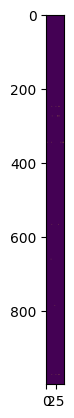

In [102]:
#suddivisione randomica del dataset tra train (70%) e test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#corversione e normalizzazione
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train[444])
plt.imshow(X_train[444]);

[paper MobilNetV2](https://arxiv.org/pdf/1801.04381v4)

https://thesis.unipd.it/retrieve/8a7c5885-2e7a-4348-868b-9793b8b0bc4f/pignotti_matteo_tesi.pdf

https://github.com/NavodPeiris/MobileNet_96x96_greyscale_weights/tree/main

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 360ms/step - accuracy: 0.5036 - loss: 0.8120 - val_accuracy: 0.7580 - val_loss: 0.5723
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8005 - loss: 0.5515 - val_accuracy: 0.7901 - val_loss: 0.4839
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7880 - loss: 0.4920 - val_accuracy: 0.8205 - val_loss: 0.4300
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8119 - loss: 0.4561 - val_accuracy: 0.8285 - val_loss: 0.4060
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8215 - loss: 0.4279 - val_accuracy: 0.8397 - val_loss: 0.3833
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8400 - loss: 0.4005 - val_accuracy: 0.8381 - val_loss: 0.3674
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8449 - loss: 0.3928 - val_accuracy: 0.8462 - val_loss: 0.3579
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8470 - loss: 0.3857 - val_accuracy: 0.8526 -

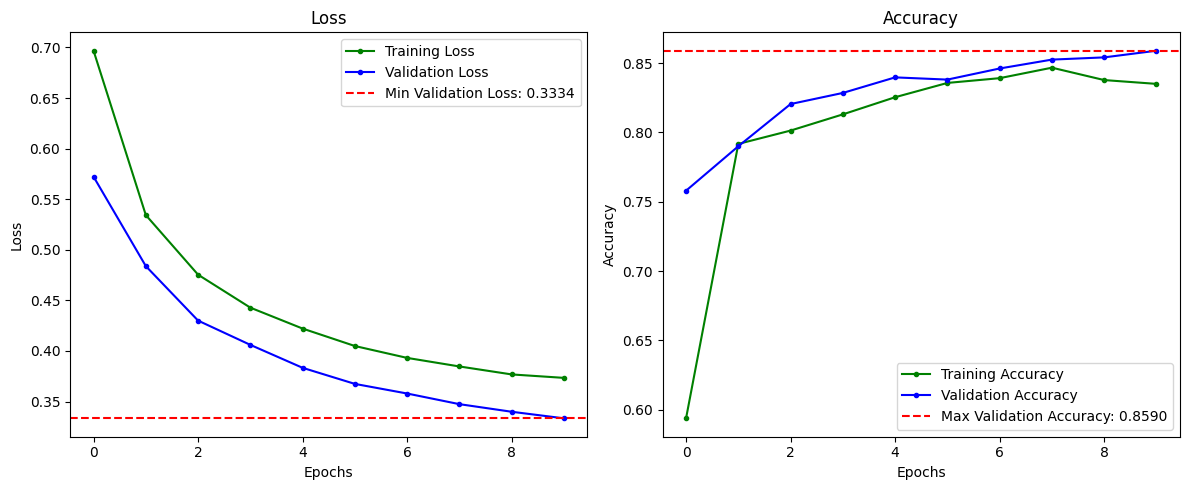

In [104]:
from transformers import MobileNetV2Config, MobileNetV2Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2

#Creazone modelo MobilNetV2:
# - input_shape(1000, 48, 1) dimensioni delle immagini di input proposte
# - include_top=False, per non includere lo strato fully connected all'inizio della rete
# - weights='mobilenetV2_0.35_96x96_greyscale_weights.h5', utilizza i pesi ottimizzati su immagini in scala di grigi


base_model = MobileNetV2(input_shape=(1000, 48, 1), include_top=False, weights='./mobilenetV2_0.35_96x96_greyscale_weights.h5', alpha=0.35)
base_model.trainable = False  # Per velocizzare

#Incluso uno strato AveragePooling per diminuire le dimensioni delle immagini nell'output
#Aggiunta dello strato fully connected 1 neurone per la classificazione con la sigmoide
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilazione
#Ottimiazzatore scelto: Adam (ha dato prestazioni migliori rispetto a RMSProp.
#Learning rate: 0.0005
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Addestramento
#Fatto su 10 epoche, batch_size=32
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    shuffle=True
)

# Plot: andamento training/validation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'g', marker='.', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', marker='.', label='Validation Loss')
plt.axhline(min(history.history['val_loss']), color='red', linestyle='--', label=f'Min Validation Loss: {min(history.history["val_loss"]):.4f}')

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g', marker='.',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b', marker='.', label='Validation Accuracy')
plt.axhline(max(history.history['val_accuracy']), color='red', linestyle='--', label=f'Max Validation Accuracy: {max(history.history["val_accuracy"]):.4f}')

plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()



In [105]:
#valutazione del modello

results = model.evaluate(X_test, y_test, verbose=0)

print(results)

[0.3334020972251892, 0.8589743375778198]


In [106]:
base_model.summary()

Model: "mobilenetv2_0.35_1000"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 1000, 48,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 500, 24,   │        144 │ input_layer_13[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 500, 24,   │         64 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 500, 24,   │          0 │ bn_Conv1[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 24,   │        144 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 24,   │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 24,   │          0 │ expanded_conv_de… │
│ (ReLU)              │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 500, 24,   │        128 │ expanded_conv_de… │
│ (Conv2D)            │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 500, 24,   │         32 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 500, 24,   │        384 │ expanded_conv_pr… │
│ (Conv2D)            │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 500, 24,   │        192 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 500, 24,   │          0 │ block_1_expand_B… │
│ (ReLU)              │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 501, 25,   │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 250, 12,   │        432 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 250, 12,   │        192 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 250, 12,   │          0 │ block_1_depthwis… │
│ (ReLU)              │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 250, 12,   │        384 │ block_1_depthwis

 Total params: 409,920 (1.56 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 409,920 (1.56 MB)